In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
import BayesianOptimization

# read the dataset 

## initial analysis of the dataset

In [2]:
df = pd.read_csv("autism_screening.csv")
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
print(f'Shape of dataframe is: {df.shape}')

print(df.info())

Shape of dataframe is: (704, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null

# missing values and inconsistencies

In [4]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [5]:
for i in df:
    print(f"{i} {df[i].unique()}")

A1_Score [1 0]
A2_Score [1 0]
A3_Score [1 0]
A4_Score [1 0]
A5_Score [0 1]
A6_Score [0 1]
A7_Score [1 0]
A8_Score [1 0]
A9_Score [0 1]
A10_Score [0 1]
age [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
gender ['f' 'm']
ethnicity ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
jundice ['no' 'yes']
austim ['no' 'yes']
contry_of_res ['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' '

In [6]:
# to find the index and to assess other column values
df[df['age'] == df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


In [7]:
# dropping record number 52
df.drop(index = 52, inplace = True)

In [8]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [9]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

no more missing values as seen above

In [10]:
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [11]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])
df['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

# data visualization

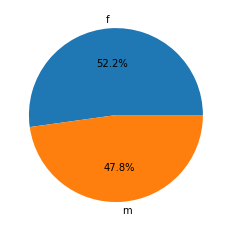

In [12]:
plt.pie(df['gender'].value_counts(), labels = df['gender'].unique(), autopct='%1.1f%%')
plt.show()

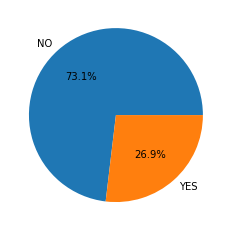

In [13]:
plt.pie(df['Class/ASD'].value_counts(), labels = df['Class/ASD'].unique(), autopct='%1.1f%%')
plt.show()

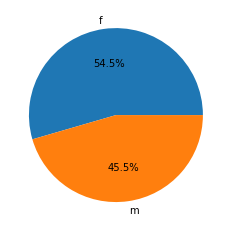

In [14]:
plt.pie(df[df['Class/ASD']=="YES"]['gender'].value_counts(), labels = df['gender'].unique(), autopct='%1.1f%%')
plt.show()

In [15]:
df.drop(['age_desc'], axis = 1, inplace = True)

# encoding the categorical values

In [16]:
encoded_df=pd.get_dummies(df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 703
Columns: 104 entries, A1_Score to Class/ASD_YES
dtypes: float64(2), int64(10), uint8(92)
memory usage: 134.6 KB


In [17]:
encoded_df.drop(['jundice_no','austim_no', 'gender_m', 'used_app_before_no','Class/ASD_NO'], axis = 1, inplace = True)
encoded_df = encoded_df.rename(columns={'jundice_yes':'jaundice','contry_of_res':'country','austim_yes':'autism','gender_f':'gender','used_app_before_yes': 'used_app_before','Class/ASD_YES': 'Class'})

# baseline mode

### use the entire dataset without any hyperparameter tuning

In [18]:
X_full = encoded_df.drop("Class", axis = 1)    # select all other feature except "Class/ASD" for training
Y = encoded_df['Class']

In [19]:
X_full_train, X_full_test, Y_train, Y_test = train_test_split(X_full, Y, test_size = 0.2)

In [20]:
print(f"Shape of X_train is: {X_full_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_full_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (562, 98)
Shape of Y_train is: (562,)

Shape of X_test is: (141, 98)
Shape of Y_test is: (141,)


In [21]:
input_dim = X_full.shape[1]
baseline_acc=[]
feature_acc=[]

# baseline- ANN

In [22]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "softmax", kernel_initializer='normal'))
model.add(Dense(1, activation = 'tanh'))

In [23]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


model.fit(X_full_train, Y_train, epochs = 30, batch_size = 10)

Epoch 1/30
57/57 [==============================] - 1s 1ms/step - loss: 4.1993 - accuracy: 0.7278
Epoch 2/30
57/57 [==============================] - 0s 980us/step - loss: 4.1993 - accuracy: 0.7278
Epoch 3/30
57/57 [==============================] - 0s 980us/step - loss: 4.1993 - accuracy: 0.7278
Epoch 4/30
57/57 [==============================] - 0s 997us/step - loss: 4.1993 - accuracy: 0.7278
Epoch 5/30
57/57 [==============================] - 0s 1ms/step - loss: 4.1993 - accuracy: 0.7278
Epoch 6/30
57/57 [==============================] - 0s 926us/step - loss: 4.1993 - accuracy: 0.7278
Epoch 7/30
57/57 [==============================] - 0s 944us/step - loss: 4.1993 - accuracy: 0.7278
Epoch 8/30
57/57 [==============================] - 0s 997us/step - loss: 4.1993 - accuracy: 0.7278
Epoch 9/30
57/57 [==============================] - 0s 926us/step - loss: 4.1993 - accuracy: 0.7278
Epoch 10/30
57/57 [==============================] - 0s 962us/step - loss: 4.1993 - accuracy: 0.7278
Epo

In [24]:
model.evaluate(X_full_test, Y_test)

5/5 [==============================] - 0s 1ms/step - loss: 3.9383 - accuracy: 0.7447


[3.938284397125244, 0.7446808218955994]

In [25]:
pred_ann = model.predict(X_full_test)
pred_ann = np.argmax(pred_ann, axis = 1)

5/5 [==============================] - 0s 1ms/step


In [26]:
baseline_acc.append(accuracy_score(Y_test, pred_ann))
print(accuracy_score(Y_test, pred_ann))

0.7446808510638298


In [27]:
print(classification_report(Y_test, pred_ann))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       105
           1       0.00      0.00      0.00        36

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.43       141
weighted avg       0.55      0.74      0.64       141



## svm baseline model

In [28]:
from sklearn import svm
classifier_svm = svm.SVC()
classifier_svm.fit(X_full_train, Y_train)

SVC()

In [29]:
pred_svm=classifier_svm.predict(X_full_test)

In [30]:
baseline_acc.append(accuracy_score(Y_test, pred_svm))
print(accuracy_score(Y_test, pred_svm))

0.9645390070921985


In [31]:
print(classification_report(Y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       105
           1       1.00      0.86      0.93        36

    accuracy                           0.96       141
   macro avg       0.98      0.93      0.95       141
weighted avg       0.97      0.96      0.96       141



# gradient descent baseline

In [32]:
from sklearn.linear_model import SGDClassifier
gd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=56)
gd_clf.fit(X_full_train, Y_train)

SGDClassifier(max_iter=56)

In [33]:
pred_gd=gd_clf.predict(X_full_test)

In [34]:
baseline_acc.append(accuracy_score(Y_test, pred_gd))
print(accuracy_score(Y_test, pred_gd))

0.9645390070921985


In [35]:
print(classification_report(Y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       105
           1       1.00      0.86      0.93        36

    accuracy                           0.96       141
   macro avg       0.98      0.93      0.95       141
weighted avg       0.97      0.96      0.96       141



# naive bayes baseline

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_full_train, Y_train)

GaussianNB()

In [37]:
pred_gnb=gnb.predict(X_full_test)

In [38]:
baseline_acc.append(accuracy_score(Y_test, pred_gnb))
print(accuracy_score(Y_test, pred_gnb))

0.375886524822695


In [39]:
print(classification_report(Y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.84      0.20      0.32       105
           1       0.28      0.89      0.42        36

    accuracy                           0.38       141
   macro avg       0.56      0.54      0.37       141
weighted avg       0.70      0.38      0.35       141



# feature selection

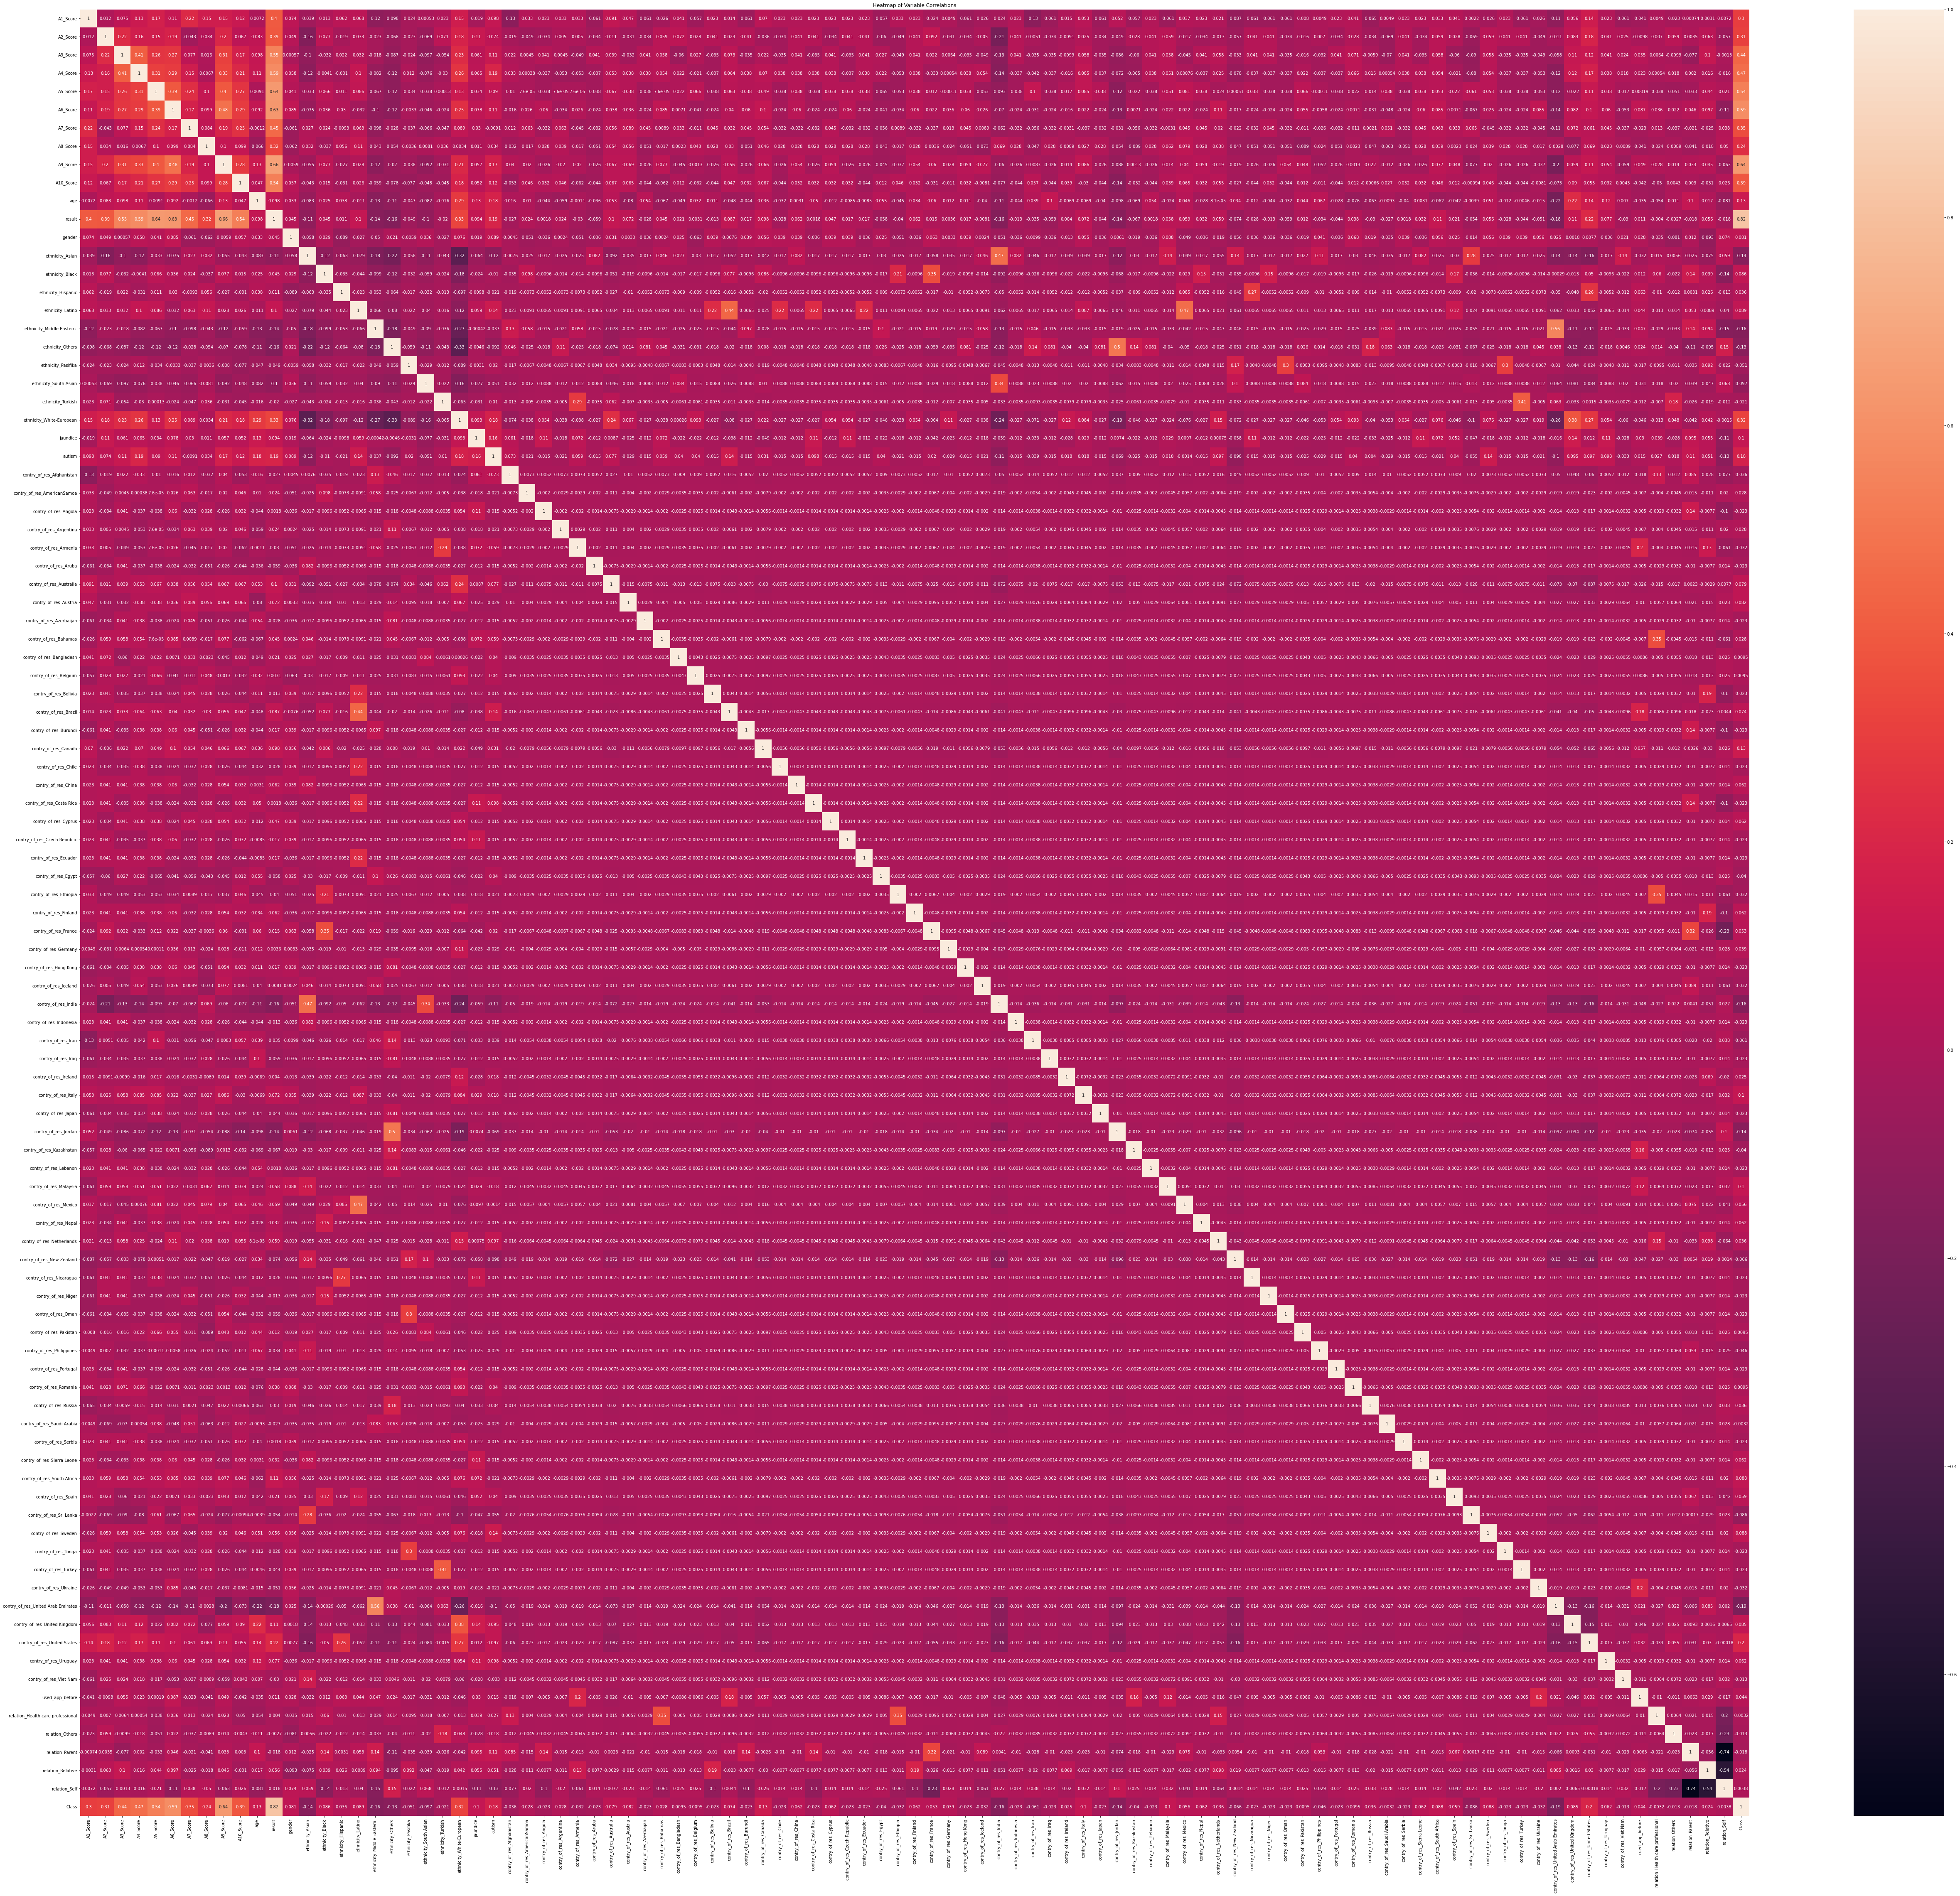

In [40]:
plt.figure(figsize=(90,80))
sns.heatmap(encoded_df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [41]:
lst=[i for i in range(12)]
X_feature_train = X_full_train.iloc[: , lst].copy() 
X_feature_test = X_full_test.iloc[: , lst].copy() 

# ann- feature selection

In [42]:
input_dim = X_feature_train.shape[1]

model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='tanh'))
model.add(Dense(5, activation = "tanh", kernel_initializer='normal'))
model.add(Dense(1, activation = 'tanh'))

In [43]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_feature_train, Y_train, epochs = 30, batch_size = 10)

Epoch 1/30
57/57 [==============================] - 0s 946us/step - loss: 0.5924 - accuracy: 0.7278
Epoch 2/30
57/57 [==============================] - 0s 944us/step - loss: 0.4505 - accuracy: 0.7278
Epoch 3/30
57/57 [==============================] - 0s 944us/step - loss: 0.3323 - accuracy: 0.7954
Epoch 4/30
57/57 [==============================] - 0s 962us/step - loss: 0.2929 - accuracy: 0.9075
Epoch 5/30
57/57 [==============================] - 0s 997us/step - loss: 0.2561 - accuracy: 0.9377
Epoch 6/30
57/57 [==============================] - 0s 997us/step - loss: 0.2347 - accuracy: 0.9288
Epoch 7/30
57/57 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9359
Epoch 8/30
57/57 [==============================] - 0s 980us/step - loss: 0.2230 - accuracy: 0.9217
Epoch 9/30
57/57 [==============================] - 0s 962us/step - loss: 0.2118 - accuracy: 0.9324
Epoch 10/30
57/57 [==============================] - 0s 844us/step - loss: 0.2205 - accuracy: 0.9075
E

In [44]:
model.evaluate(X_feature_test, Y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.9007


[0.27272844314575195, 0.9007092118263245]

In [45]:
pred_ann_f = model.predict(X_feature_test)
pred_ann_f = np.argmax(pred_ann_f, axis = 1)

5/5 [==============================] - 0s 1ms/step


In [46]:
feature_acc.append(accuracy_score(Y_test, pred_ann_f))
print(accuracy_score(Y_test, pred_ann_f))

0.7446808510638298


In [47]:
print(classification_report(Y_test, pred_ann_f))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       105
           1       0.00      0.00      0.00        36

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.43       141
weighted avg       0.55      0.74      0.64       141



# svm- feature selection

In [48]:
classifier_svm.fit(X_feature_train, Y_train)

SVC()

In [49]:
pred_svm_f=classifier_svm.predict(X_feature_test)

In [50]:
feature_acc.append(accuracy_score(Y_test, pred_svm_f))
print(accuracy_score(Y_test, pred_svm_f))

0.9645390070921985


In [51]:
print(classification_report(Y_test, pred_svm_f))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       105
           1       1.00      0.86      0.93        36

    accuracy                           0.96       141
   macro avg       0.98      0.93      0.95       141
weighted avg       0.97      0.96      0.96       141



# gradient descent- feature selection

In [52]:
gd_clf.fit(X_feature_train, Y_train)

SGDClassifier(max_iter=56)

In [53]:
pred_gd_f=gd_clf.predict(X_feature_test)

In [54]:
feature_acc.append(accuracy_score(Y_test, pred_gd_f))
print(accuracy_score(Y_test, pred_gd_f))

0.9858156028368794


In [55]:
print(classification_report(Y_test, pred_gd_f))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.94      0.97        36

    accuracy                           0.99       141
   macro avg       0.99      0.97      0.98       141
weighted avg       0.99      0.99      0.99       141



# naive bayes- feature selection

In [56]:
gnb.fit(X_feature_train, Y_train)

GaussianNB()

In [57]:
pred_gnb_f=gnb.predict(X_feature_test)

In [58]:
feature_acc.append(accuracy_score(Y_test, pred_gnb_f))
print(accuracy_score(Y_test, pred_gnb_f))

0.9716312056737588


In [59]:
print(classification_report(Y_test, pred_gnb_f))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.97      0.92      0.94        36

    accuracy                           0.97       141
   macro avg       0.97      0.95      0.96       141
weighted avg       0.97      0.97      0.97       141



# models visualization

[0.7446808510638298, 0.9645390070921985, 0.9645390070921985, 0.375886524822695]
[0.7446808510638298, 0.9645390070921985, 0.9858156028368794, 0.9716312056737588]


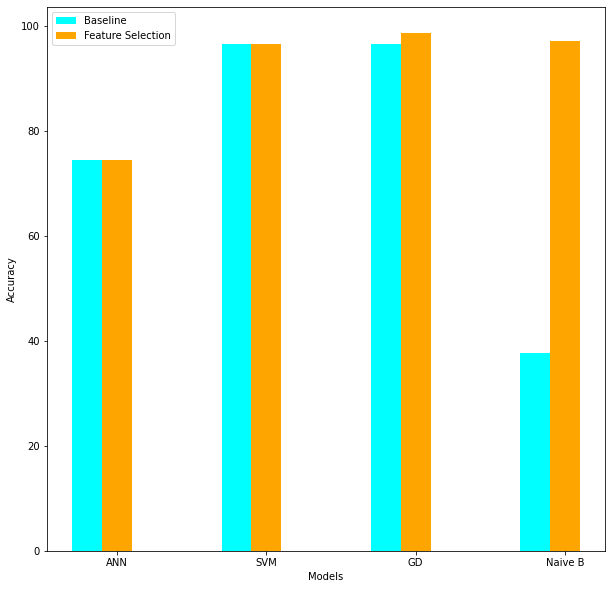

In [61]:
# create data
x = np.arange(4)
width = 0.2

baseline = list(map(lambda x : x *100, baseline_acc))
print(baseline_acc)
feature = list(map(lambda x : x *100, feature_acc))
print(feature_acc)

# plot data in grouped manner of bar type
plt.figure(figsize=(10,10))
plt.bar(x-0.2, baseline, width, color='cyan')
plt.bar(x, feature, width, color='orange')
plt.xticks(x, ['ANN', 'SVM', 'GD', 'Naive B'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(["Baseline", "Feature Selection"])
plt.show()


[0.7446808510638298, 0.9645390070921985, 0.9645390070921985, 0.375886524822695]
[0.7446808510638298, 0.9645390070921985, 0.9858156028368794, 0.9716312056737588]


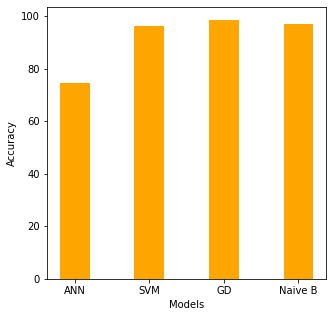

In [67]:
# create data
x = np.arange(4)
width = 0.4

baseline = list(map(lambda x : x *100, baseline_acc))
print(baseline_acc)
feature = list(map(lambda x : x *100, feature_acc))
print(feature_acc)

# plot data in grouped manner of bar type
plt.figure(figsize=(5,5))
plt.bar(x, feature, width, color='orange')
plt.xticks(x, ['ANN', 'SVM', 'GD', 'Naive B'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()
